In [1]:
#######################################################
#######################################################
#######################################################

## Decision Trees: Decision Trees - 4 EXERCISE ANSWERS ##





#### Exercise ####


#### Please refer to module 2 of DecisionTrees - DecisionTrees for Tasks 1-6
#### Task 1
##### Import the required packages
##### Set the working directory (home_dir, main_dir, data_dir, plot_dir)
#### Result:


In [2]:
# Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.legend_handler import HandlerLine2D
# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)

data_dir = str(main_dir) + "/data"
print(data_dir)

plot_dir = str(main_dir) + "/plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
print(plot_dir)
print(plot_dir)


C:\
C:\/data
C:\/plots
C:\/plots


#### Task 2
##### Read the dataset as `ex_df`
##### Subset the dataframe to include only numeric and categorical columns
##### Delete columns containing either 65% or more than 65% NaN Values
##### Write a function to impute NA in both numeric and categorical columns
#### Result:


In [3]:

# Read dataset 
ex_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
# Subset data
ex_df = ex_df[['creatinine_phosphokinase', 'age', 'time', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'platelets', 'smoking', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'death_event', 'id']]

# Delete columns containing either 65% or more than 65% NaN Values
ex_perc = 65.0
ex_min_count =  int(((100-ex_perc)/100)*ex_df.shape[0] + 1)
ex_df = ex_df.dropna(axis=1, 
               thresh=ex_min_count)

# Function to impute NA in both numeric and categorical columns
def fillna(ex_df):
    # Fill numeric columns with mean value
    ex_df = ex_df.fillna(ex_df.mean())    
    # Fill categorical columns with mode value
    ex_df = ex_df.fillna(ex_df.mode().iloc[0])
    return ex_df
  
ex_df = fillna(ex_df)


#### Task 3
##### Identify the the two unique classes
#### Result:


In [4]:
# Identify the the two unique classes
ex_threshold = ex_df['death_event'].mean()
ex_df['death_event'] = np.where(ex_df['death_event'] > ex_threshold, 1,0)


#### Task 4
##### 
##### Split the data into ex_X and ex_y
#### Result:


In [5]:

ex_unique_values = sorted(ex_df['death_event'].unique())
ex_df['death_event'] = np.where(ex_df['death_event'] == ex_unique_values[0],  False,True)
# Check class again.
print(ex_df['death_event'].dtypes)

# Split the data into ex_X and ex_y 
ex_columns_to_drop_from_X = ['death_event'] + ['id']
ex_X = ex_df.drop(ex_columns_to_drop_from_X, axis = 1)
ex_y = np.array(ex_df['death_event'])

ex_X = pd.get_dummies(ex_X, columns = ['smoking', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex'], dtype=float, drop_first=True)
print(ex_X.dtypes)



bool
creatinine_phosphokinase      int64
age                         float64
time                          int64
serum_creatinine            float64
ejection_fraction             int64
serum_sodium                  int64
platelets                   float64
smoking_1                   float64
anaemia_1                   float64
diabetes_1                  float64
high_blood_pressure_1       float64
sex_1                       float64
dtype: object


#### Task 5
##### Implement the Decision Tree and print it.
##### Visualize `clf_fit_small`
##### Split into train and test.
#### Result:


DecisionTreeClassifier()


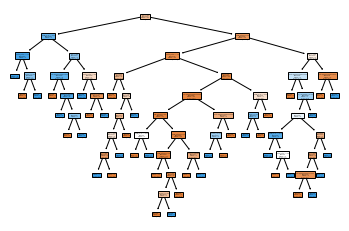

(209, 12) (209,)
(90, 12) (90,)


In [6]:
# Implement the Decision Tree on ex_X.
clf = tree.DecisionTreeClassifier()
clf_fit = clf.fit(ex_X, ex_y)
print(clf_fit)

# Visualize `clf_fit_small`
tree.plot_tree(clf_fit, 
              feature_names= ex_X.columns,  
              filled=True)
plt.show()

# Split into train and test.
ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_X, ex_y, test_size = 0.3)
print(ex_X_train.shape, ex_y_train.shape)
print(ex_X_test.shape, ex_y_test.shape)



#### Task 6
##### Implement the Decision Tree on ex_X_train
##### Predict on ex_X_test
#### Result:


In [7]:
# Implement the Decision Tree on ex_X_train.
clf = tree.DecisionTreeClassifier()
clf_fit = clf.fit(ex_X_train, ex_y_train)

# Predict on ex_X_test.
ex_y_predict = clf_fit.predict(ex_X_test)
ex_y_predict[:20]


array([False, False, False,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True])

#### Please refer to module 3 of DecisionTrees - DecisionTrees for Task 7
#### Task 7
##### Compute test model accuracy score.
##### Compute accuracy using training data.
##### Calculate cv scores (accuracy) and print them.
#### Result:


In [8]:

# Compute test model accuracy score.
ex_tree_accuracy_score = metrics.accuracy_score(ex_y_test, ex_y_predict)
print("Accuracy on test data: ", ex_tree_accuracy_score)

# Compute accuracy using training data.
ex_acc_train_tree = clf_fit.score(ex_X_train,
                                 ex_y_train)
print ("Train Accuracy:", ex_acc_train_tree)
ex_clf = tree.DecisionTreeClassifier()
ex_cv_scores = cross_val_score(ex_clf, ex_X, ex_y, cv = 10)
# Print each cv score (accuracy) and average them.
print(ex_cv_scores)


Accuracy on test data:  0.8111111111111111
Train Accuracy: 1.0
[0.33333333 0.76666667 0.8        0.9        0.9        0.8
 0.6        0.56666667 0.7        0.65517241]


#### Please refer to module 4 of DecisionTrees - DecisionTrees for Tasks 8-12
#### Task 8
##### Define function that will determine the optimal number for each parameter.
##### Optimize: max_depth
#### Result:


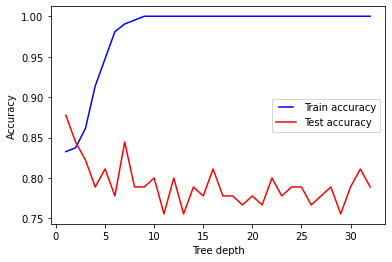

In [9]:
# Define function that will determine the optimal number for each parameter.
def optimal_parameter(values,test_results):
    best_test_value = max(test_results)
    best_test_index = test_results.index(best_test_value)
    best_value = values[best_test_index]
    return(best_value)
  
# Fit a Decision Tree with depths ranging from 1 to 32 and plot the training and test accuracy
ex_max_depths = np.linspace(1, 32, 32, endpoint = True)
ex_train_results = []
ex_test_results = []

for max_depth in ex_max_depths:
   ex_dt = DecisionTreeClassifier(max_depth = max_depth)
   ex_dt.fit(ex_X_train, ex_y_train)
   
   ex_train_pred = ex_dt.predict(ex_X_train)
   ex_acc_train = accuracy_score(ex_y_train, ex_train_pred)
   
   # Add accuracy score to previous train results
   ex_train_results.append(ex_acc_train)
   
   ex_y_pred = ex_dt.predict(ex_X_test)
   ex_acc_test = accuracy_score(ex_y_test, ex_y_pred)
   
   # Add accuracy score to previous test results
   ex_test_results.append(ex_acc_test)

# Store optimal max_depth.
ex_optimal_max_depth = optimal_parameter(ex_max_depths,ex_test_results)  

# Plot max depth over 1 - 32. 
line1, = plt.plot(ex_max_depths, ex_train_results, 'b', label= "Train accuracy")
line2, = plt.plot(ex_max_depths, ex_test_results, 'r', label= "Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()



#### Task 9
##### Optimize: min samples split
#### Result:


In [10]:
ex_min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
ex_train_results = []
ex_test_results = []

for min_samples_split in ex_min_samples_splits:
   ex_dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   ex_dt.fit(ex_X_train, ex_y_train)
   
   ex_train_pred = ex_dt.predict(ex_X_train)
   ex_acc_train = accuracy_score(ex_y_train, ex_train_pred)
   
   # Add accuracy score to previous train results
   ex_train_results.append(ex_acc_train)
   
   ex_y_pred = ex_dt.predict(ex_X_test)
   ex_acc_test = accuracy_score(ex_y_test, ex_y_pred)
   
   # Add accuracy score to previous test results
   ex_test_results.append(ex_acc_test)

# Store optimal max_depth.
ex_optimal_min_samples_split = optimal_parameter(ex_min_samples_splits,ex_test_results) 




#### Task 10
##### Optimize: Min_samples_leaf 
##### Optimize: max features
#### Result:


In [11]:
# Min_samples_leaf:
ex_min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)
ex_train_results = []
ex_test_results = []

for min_samples_leaf in ex_min_samples_leafs:
   ex_dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   ex_dt.fit(ex_X_train, ex_y_train)
   
   ex_train_pred = ex_dt.predict(ex_X_train)
   ex_acc_train = accuracy_score(ex_y_train, ex_train_pred)
   
   # Add accuracy score to previous train results
   ex_train_results.append(ex_acc_train)
   
   ex_y_pred = ex_dt.predict(ex_X_test)
   ex_acc_test = accuracy_score(ex_y_test, ex_y_pred)
   
   # Add accuracy score to previous test results
   ex_test_results.append(ex_acc_test)

ex_optimal_min_samples_leafs = optimal_parameter(ex_min_samples_leafs,ex_test_results)


# Optimize: max features
ex_max_features = list(range(1,ex_X.shape[1]))
ex_train_results = []
ex_test_results = []

for max_feature in ex_max_features:
   ex_dt = DecisionTreeClassifier(max_features=max_feature)
   ex_dt.fit(ex_X_train, ex_y_train)
   
   ex_train_pred = ex_dt.predict(ex_X_train)
   ex_acc_train = accuracy_score(ex_y_train, ex_train_pred)
   
   # Add accuracy score to previous train results
   ex_train_results.append(ex_acc_train)
   
   ex_y_pred = ex_dt.predict(ex_X_test)
   ex_acc_test = accuracy_score(ex_y_test, ex_y_pred)
   
   # Add accuracy score to previous test results
   ex_test_results.append(ex_acc_test)

ex_optimal_max_features = optimal_parameter(ex_max_features,ex_test_results) 




#### Task 11
##### Print: ex_optimal_max_depth,ex_optimal_min_samples_split, ex_optimal_min_samples_split, ex_optimal_max_features
#### Result:


In [12]:
print("The optimal max depth is:", ex_optimal_max_depth)
print("The optimal min samples split is:", ex_optimal_min_samples_split)
print("The optimal min samples leaf is:", ex_optimal_min_samples_split)
print("The optimal max features is:", ex_optimal_max_features)



The optimal max depth is: 1.0
The optimal min samples split is: 0.8
The optimal min samples leaf is: 0.8
The optimal max features is: 8


#### Task 12
##### Set the seed.
##### Build Decision Tree classifier with optimized values calculated above
##### Compute accuracy of the optimized model using training data
#### Result:


In [13]:

# Build optimized model
np.random.seed(1)

# Implement the Decision Tree on ex_X_train.
ex_clf_optimized = tree.DecisionTreeClassifier(max_depth = ex_optimal_max_depth,
                                            min_samples_split = ex_optimal_min_samples_split,
                                            min_samples_leaf = ex_optimal_min_samples_leafs,
                                            max_features = ex_optimal_max_features)
                                            
# We can now see our optimized features where before they were just default:
print(ex_clf_optimized)
ex_clf_optimized_fit = ex_clf_optimized.fit(ex_X_train, ex_y_train)
# Predict on ex_X_test.
ex_y_predict_optimized = ex_clf_optimized_fit.predict(ex_X_test)
# Get the accuracy score.
ex_acc_score_tree_optimized = accuracy_score(ex_y_test, ex_y_predict_optimized)
print(ex_acc_score_tree_optimized)


# Compute accuracy using training data.
ex_acc_train_tree_optimized = ex_clf_optimized_fit.score(ex_X_train, ex_y_train)
print ("Train Accuracy:", ex_acc_train_tree_optimized)





DecisionTreeClassifier(max_depth=1.0, max_features=8, min_samples_leaf=0.2,
                       min_samples_split=0.8)
0.8777777777777778
Train Accuracy: 0.8325358851674641
